In [2]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
from matplotlib import pyplot as plt
from io import StringIO
import collections

In [3]:
#read features into Pandas DataFrame
data=pd.read_csv('data.csv')

In [4]:
#read labels
labels =pd.read_csv('labels.csv')

In [5]:
#drop datapoints ID
X = data.drop(data.columns[0],axis=1)
Y = labels.Class
X = X.values
Y = np.array(Y)

In [6]:
count_labels = collections.Counter(Y)
count_labels

Counter({'PRAD': 136, 'LUAD': 141, 'BRCA': 300, 'KIRC': 146, 'COAD': 78})

<BarContainer object of 5 artists>

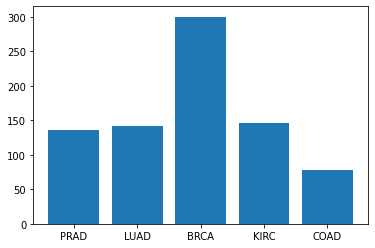

In [7]:
cnt = collections.Counter(count_labels)
plt.bar(cnt.keys(), cnt.values())

In [9]:
#K-means function
def kMeans(X, K, maxIters = 20, plot_progress = None):

    centroids = X[np.random.choice(len(X), K)]
    for i in range(maxIters):
        # Cluster Assignment step
        C = np.array([np.argmin([(x_i-y_k)@(x_i-y_k) for y_k in centroids]) for x_i in X])
        # Update centroids step 
        centroids = []
        for k in range(K):
            if (C == k).any():
                centroids.append( X[C == k].mean(axis = 0) )
            else: # if there are no data points assigned to this certain centroid
                centroids.append( X[np.random.choice(len(X))] )
        if plot_progress != None: plot_progress(X, C, np.array(centroids))
    return np.array(centroids) , C

In [10]:
centroids, c = kMeans(X, 5,100)

In [11]:
print(centroids, "\n",c)

[[0.02654385 3.44104073 3.97126223 ... 9.69678011 5.8496973  0.03572931]
 [0.02250051 3.44083332 3.23252914 ... 9.35115207 3.6022328  0.03282325]
 [0.04108822 3.37127335 3.47034268 ... 9.36805457 5.35571692 0.20880807]
 [0.04686506 2.39455662 2.44209827 ... 9.43000135 5.12209056 0.12948832]
 [0.01128645 2.83527335 2.80449053 ... 9.7851823  6.14993228 0.06894019]] 
 [0 2 0 0 4 0 3 0 4 0 4 3 0 4 4 4 2 3 3 0 4 3 2 4 3 2 1 4 4 4 4 4 3 4 0 4 3
 2 4 4 3 0 0 3 3 4 0 1 4 2 4 2 4 0 1 4 4 1 3 4 2 4 4 2 0 1 4 0 3 4 3 4 4 2
 4 2 4 3 0 1 4 0 4 4 0 0 4 4 3 4 0 0 4 4 4 0 1 4 0 4 4 3 4 3 2 3 2 1 2 2 0
 4 2 0 4 3 3 3 4 4 2 3 2 4 0 0 0 4 3 4 1 4 1 4 4 3 2 4 3 1 4 0 4 3 2 1 0 4
 2 2 2 2 4 4 2 4 4 0 0 2 0 2 3 4 0 2 1 3 2 4 3 2 4 2 4 4 4 0 4 3 1 3 4 0 0
 0 2 2 4 2 2 3 2 0 2 4 4 4 2 2 4 3 3 3 3 0 4 0 4 2 2 4 0 4 0 4 4 4 2 4 3 2
 3 3 2 4 3 0 4 2 2 0 1 4 3 0 3 1 4 3 3 2 0 0 2 2 3 4 4 1 4 0 1 4 0 3 0 0 0
 4 1 1 2 1 1 0 2 4 4 3 3 4 1 0 3 0 4 4 3 4 4 4 4 2 2 4 4 4 3 3 3 3 4 4 4 3
 4 4 2 0 4 4 1 2 0 4 4 4 1 4 0 4

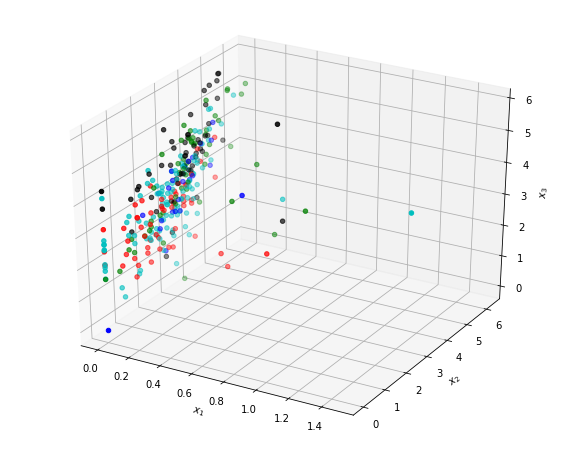

In [12]:
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')
LABEL_COLOR_MAP = {0 : 'k',1 : 'b',2 : 'g', 3: 'r', 4: 'c'}
label = [LABEL_COLOR_MAP[l] for l in c[0:300]]
ax.scatter(X[0:300,0], X[0:300,1], X[0:300,2], c=label, marker='o')
ax.scatter(0,0,0, c='b', marker='o')
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
ax.set_zlabel('$x_3$')
plt.show()

In [13]:
#singular value decomposition
U,s,VT = np.linalg.svd(X,full_matrices=False)
print(U.shape, s.shape,VT.shape)

(801, 801) (801,) (801, 20531)


In [14]:
X_3_approx = s[0]*U[:,[0]]@VT[[0],:] + s[1]*U[:,[1]]@VT[[1],:] + s[2]*U[:,[2]]@VT[[2],:]

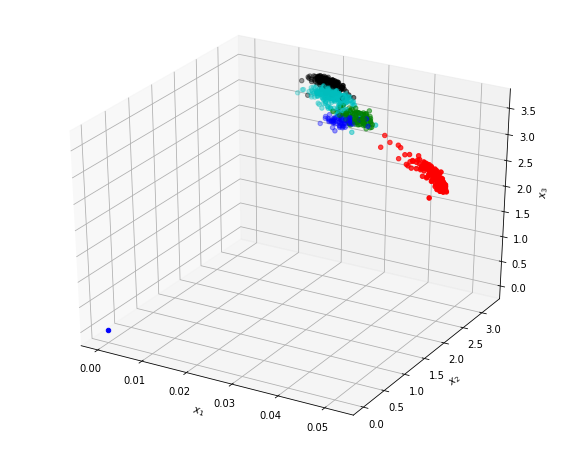

In [15]:
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')
LABEL_COLOR_MAP = {0 : 'k',1 : 'b',2 : 'g', 3: 'r', 4: 'c'}
label = [LABEL_COLOR_MAP[l] for l in c]
ax.scatter(X_3_approx[:,0], X_3_approx[:,1], X_3_approx[:,2], c=label, marker='o')
ax.scatter(0,0,0, c='b', marker='o')
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
ax.set_zlabel('$x_3$')
plt.show()

# Binary Classification

In [6]:
ind_1 = [i for i, s in enumerate(Y) if 'PRAD' in s]
ind_2 = [i for i, s in enumerate(Y) if 'LUAD' in s]
ind_3 = [i for i, s in enumerate(Y) if 'BRCA' in s]
ind_4 = [i for i, s in enumerate(Y) if 'KIRC' in s]
ind_5 = [i for i, s in enumerate(Y) if 'COAD' in s]
print(len(ind_1),"  ",len(ind_2),"  ",len(ind_3),"  ",len(ind_4),"  ", len(ind_5))

136    141    300    146    78


In [7]:
X_1 = X[ind_1]
X_2 = X[ind_2]
X_3 = X[ind_3]
X_4 = X[ind_4]
X_5 = X[ind_5]

In [8]:
labels = {1:'PRAD', 2:'LUAD', 3:'BRCA', 4:'KIRC', 5:'COAD'}

In [9]:
#binary classification 1:'PRAD', -1:'LUAD'
y_1 = np.ones((X_1.shape[0]))
y_2 = np.ones((X_2.shape[0]))*-1
y_1 = y_1.reshape(-1,1)
y_2 = y_2.reshape(-1,1)
y_1_2 = np.vstack((y_1,np.array(y_2)))
X_1_2 = np.vstack((X_1,np.array(X_2)))

In [10]:
print(X_1_2.shape,y_1_2.shape)

(277, 20531) (277, 1)


In [11]:
U,s,VT = np.linalg.svd(X_1_2,full_matrices=False)
print(U.shape, s.shape,VT.shape)


(277, 277) (277,) (277, 20531)


In [12]:
X_3_binary = s[0]*U[:,[0]]@VT[[0],:] + s[1]*U[:,[1]]@VT[[1],:] + s[2]*U[:,[2]]@VT[[2],:]

In [ ]:
## Classifier 
#n_eval = np.size(y_1_2)
#n_train = np.size(X_1_2)
#X_1_2_train = np.hstack((X_1_2 , np.ones((n_train,1))))
#X_1_2_eval = np.hstack((y_1_2, np.ones((n_eval,1))))

w_opt = np.linalg.inv(X_3_binary.transpose()@X_3_binary)@X_3_binary.transpose()@y_1_2
y_hat = np.sign(X_1_2@w_opt)

plt.scatter(X_3_binary[:,0],X_3_binary[:,1], color=['c' if i==-1 else 'r' for i in y_hat[:,0]])
plt.title('predicted class on eval data')
plt.show()

In [164]:
from scipy.io import loadmat
from matplotlib import pyplot as plt

In [165]:
def ista_solve_hot(A, d, la_array):
    # ista_solve_hot: Iterative soft-thresholding for multiple values of
    # lambda with hot start for each case - the converged value for the previous
    # value of lambda is used as an initial condition for the current lambda.
    # this function solves the minimization problem
    # Minimize |Ax-d|_2^2 + lambda*|x|_1 (Lasso regression)
    # using iterative soft-thresholding.
    max_iter = 10**4
    tol = 10**(-3)
    tau = 1/np.linalg.norm(A,2)**2
    n = A.shape[1]
    w = np.zeros((n,1))
    num_lam = len(la_array)
    X = np.zeros((n, num_lam))
    for i, each_lambda in enumerate(la_array):
        for j in range(max_iter):
            z = w - tau*(A.transpose()@(A@w - d))
            w_old = w
            w = np.sign(z) * np.clip(np.abs(z)-tau*each_lambda/2, 0, np.inf)
            X[:, i:i+1] = w
            if np.linalg.norm(w - w_old) < tol:
                break
    return X

In [137]:
At = X[:100,:]
dt = y[:100,:]

Av = X[100:,:]
dv = y[100:]
lam_vals=[1e-6,1e-4,1e-2,1e-1]
lam_vals=np.hstack((lam_vals,np.logspace(0,2,num=20)))
number=lam_vals.shape[0]
w=ista_solve_hot(At,dt,lam_vals);

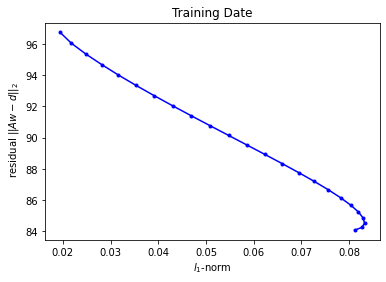

In [141]:
err = []
res = []
norm = []
nonz = []
errv = []
resv = []
for i in range(number):
    err.append(np.mean(np.sign(At@w[:,i:i+1])!=dt))
    res.append(np.linalg.norm(At@w[:,i:i+1]-dt)**2)
    norm.append(np.linalg.norm(w[:,i],1))
    nonz.append(np.sum(abs(w[:,i]) > 1e-6))

    errv.append(np.mean(np.sign(Av@w[:,i:i+1])!=dv))
    resv.append(np.linalg.norm(Av@w[:,i:i+1]-dv)**2)

#plot
plt.figure()
plt.plot(norm, res,'b.-')
plt.xlabel('$l_1$-norm')
plt.ylabel(' residual $||Aw - d||_2$')   
plt.title('Training Date')    
plt.show()